In [5]:
import pandas as pd
import pyfixest as pf
from pyfixest import feols, etable

# 1. Load data
url = "http://dss.princeton.edu/training/Panel101.dta"
mydata = pd.read_stata(url)

# 2. Create DiD variables
mydata["y"] = mydata["y"] / 1_000_000_000
mydata["post"] = (mydata["year"] >= 1994).astype(int)
mydata["treated"] = mydata["country"].isin(["E", "F", "G"]).astype(int)

# 3. Estimate models with different vcov:
models = [
feols("y ~ treated*post", data=mydata, vcov="iid"),
feols("y ~ treated*post", data=mydata, vcov="HC3"),
feols("y ~ treated*post", data=mydata, vcov={"CRV1": "country"}),
feols("y ~ treated*post", data=mydata, vcov={"CRV3": "country + year"}),
]
display(etable(models,
headers=["IID", "HC3", "CRV1 (1-Way)", "CRV3 (2-Way)"],
signif_code=[0.01, 0.05, 0.10]))

GT(_tbl_data=  level_0        level_1                     0                     1  \
0    coef        treated    1.776 <br> (1.128)    1.776 <br> (1.127)   
1    coef           post  2.289** <br> (0.953)  2.289** <br> (0.954)   
2    coef   treated:post  -2.520* <br> (1.456)   -2.520 <br> (1.550)   
3    coef      Intercept    0.358 <br> (0.738)    0.358 <br> (0.812)   
4   stats   Observations                    70                    70   
5   stats      S.E. type                   iid                hetero   
6   stats  R<sup>2</sup>                 0.083                 0.083   

                       2                    3  
0     1.776 <br> (1.394)   1.776 <br> (1.700)  
1   2.289** <br> (0.635)   2.289 <br> (1.205)  
2  -2.520** <br> (1.027)  -2.520 <br> (1.549)  
3     0.358 <br> (1.001)   0.358 <br> (1.534)  
4                     70                   70  
5            by: country     by: country+year  
6                  0.083                0.083  , _body=<great_tables._gt_data.Body object at 0x157859ad0>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='2', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None), ColInfo(var='3', type=<ColInfoTypeEnum.default: 1>, column_label='(4)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x33bdd3e50>, _spanners=Spanners([SpannerInfo(spanner_id='y', spanner_level=1, spanner_label='y', spanner_units=None, spanner_pattern=None, vars=['0', '1', '2', '3'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.1, ** p < 0.05, *** p < 0.01. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x33bdd2990>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_bord

          Y        Y2   X1        X2    f1    f2    f3  group_id        Z1  \
0       NaN  2.357103  0.0  0.457858  15.0   0.0   7.0       9.0 -0.330607   
1 -1.458643  5.163147  NaN -4.998406   6.0  21.0   4.0       8.0       NaN   
2  0.169132  0.751140  2.0  1.558480   NaN   1.0   7.0      16.0  1.207778   
3  3.319513 -2.656368  1.0  1.560402   1.0  10.0  11.0       3.0  2.869997   
4  0.134420 -1.866416  2.0 -3.472232  19.0  20.0   6.0      14.0  0.835819   

         Z2   weights  
0  1.054826  0.661478  
1 -4.113690  0.772732  
2  0.465282  0.990929  
3  0.467570  0.021123  
4 -3.115669  0.790815  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Y         999 non-null    float64
 1   Y2        1000 non-null   float64
 2   X1        999 non-null    float64
 3   X2        1000 non-null   float64
 4   f1        999 non-null    float64
 5   f2 

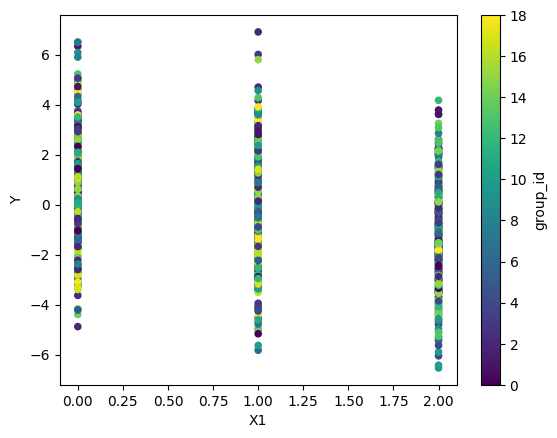

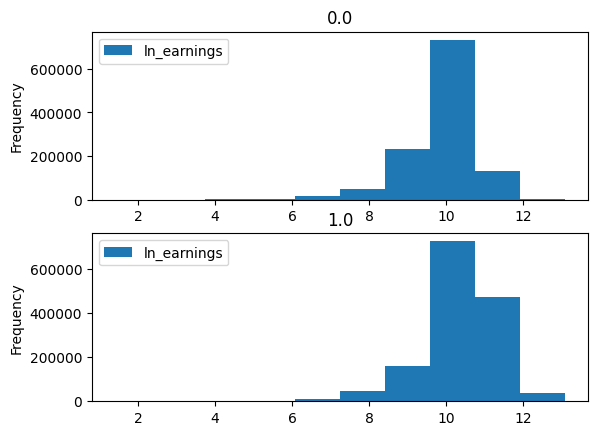

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
    from lets_plot import LetsPlot
    _HAS_LETS_PLOT = True
except ImportError:
    _HAS_LETS_PLOT = False

from marginaleffects import slopes, avg_slopes
import pyfixest as pf

# Optional: Uncomment if using Jupyter + lets_plot
# if _HAS_LETS_PLOT:
#     LetsPlot.setup_html()

# Optional: Jupyter-only styling commands
# %load_ext watermark
# %config InlineBackend.figure_format = "retina"
# %watermark --iversions

# ---------------------------------------------------------------------------
# Read sample data
data = pf.get_data()
print(data.head())
print(data.info())

# Quick scatter
ax = data.plot(kind="scatter", x="X1", y="Y", c="group_id", colormap="viridis")

# OLS with fixed effects
fit = pf.feols(fml="Y ~ X1 | group_id", data=data, vcov="HC1")
print(type(fit))
print(fit.summary())
pf.etable(fit)
pf.summary(fit)

print(fit.tidy())
print(fit.coef())
print(fit.se())
print(fit.tstat())
print(fit.confint())

fit.coefplot()
# or pf.coefplot([fit])

# Simple OLS without FE
fit_simple = pf.feols("Y ~ X1", data=data, vcov="HC1")
print(fit_simple.summary())

pf.etable([fit, fit_simple])

# OLS with explicit dummies for group_id
fit_dummy = pf.feols("Y ~ X1 + C(group_id) ", data=data, vcov="HC1")
print(fit_dummy.summary())

# Manual demeaning approach
def _demean_column(df: pd.DataFrame, column: str, by: str) -> pd.Series:
    return df[column] - df.groupby(by)[column].transform("mean")

fit_demeaned = pf.feols(
    fml="Y_demeaned ~ X1_demeaned",
    data=data.assign(
        Y_demeaned=lambda df: _demean_column(df, "Y", "group_id"),
        X1_demeaned=lambda df: _demean_column(df, "X1", "group_id"),
    ),
    vcov="HC1",
)
print(fit_demeaned.summary())

# Updating Regression Coefficients
data_subsample = data.sample(frac=0.5)
m = pf.feols("Y ~ X1 + X2", data=data_subsample)
print(m._beta_hat)

new_points_id = np.random.choice(list(set(data.index) - set(data_subsample.index)), 5)
X_new = np.c_[np.ones(len(new_points_id)), data.loc[new_points_id][["X1", "X2"]].values]
y_new = data.loc[new_points_id]["Y"].values
m.update(X_new, y_new)

print(
    pf.feols(
        "Y ~ X1 + X2", 
        data=data.loc[data_subsample.index.append(pd.Index(new_points_id))]
    ).coef().values
)

# ---------------------------------------------------------------------------
# Standard Errors and Inference

# Changing inference “on-the-fly”
print(fit.vcov({"CRV1": "group_id + f2"}).summary())
print(fit.vcov({"CRV3": "group_id"}).summary())

# Wild bootstrap
fit2 = pf.feols(fml="Y ~ X1", data=data, vcov={"CRV1": "group_id"})
print(fit2.wildboottest(param="X1", reps=999))

# Causal cluster variance estimator
df = pd.read_stata("http://www.damianclarke.net/stata/census2000_5pc.dta")
print(df.head())
axes = df.plot.hist(column=["ln_earnings"], by=["college"])
fit3 = pf.feols("ln_earnings ~ college", vcov={"CRV1": "state"}, data=df)
print(fit3.ccv(treatment="college", pk=0.05, n_splits=2, seed=929))

# Randomization inference
print(fit2.ritest(resampvar="X1=0", reps=1000, cluster="group_id"))

# Multiple testing corrections
print(pf.bonferroni([fit, fit2], param="X1").round(3))
print(pf.rwolf([fit, fit2], param="X1", reps=9999, seed=1234).round(3))
print(pf.wyoung([fit, fit2], param="X1", reps=9999, seed=1234).round(3))

# Joint confidence intervals
fit_ci = pf.feols("Y ~ X1+ C(f1)", data=data)
print(fit_ci.confint(joint=True).head())


In [11]:
pip install marginaleffects


  Using cached numpy-2.2.4-cp311-cp311-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached plotnine-0.14.5-py3-none-any.whl.metadata (9.3 kB)
  Using cached mizani-0.13.1-py3-none-any.whl.metadata (4.7 kB)
Using cached numpy-2.2.4-cp311-cp311-macosx_14_0_arm64.whl (5.4 MB)
Using cached plotnine-0.14.5-py3-none-any.whl (1.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 75.3 MB/s eta 0:00:00a 0:00:01
Using cached mizani-0.13.1-py3-none-any.whl (127 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.12.0
    Uninstalling scipy-1.12.0:
      Successfully uninstalled scipy-1.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, bu

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

# Load and prepare data
url = "http://dss.princeton.edu/training/Panel101.dta"
df = pd.read_stata(url)
df['y'] = df['y']/1e9
df['post'] = (df['year'] >= 1994).astype(int)
df['treated'] = df['country'].isin(['E','F','G']).astype(int)
df['treated_post'] = df['treated'] * df['post']

# Design matrix and outcome
X = np.column_stack([np.ones(len(df)), df['treated'], df['post'], df['treated_post']])
y = df['y'].values

# OLS coefficients
beta = np.linalg.inv(X.T @ X) @ X.T @ y
residuals = y - X @ beta

def compute_vcov(method='iid', cluster=None):
    """
    Compute variance-covariance matrix using pyfixest formulas:
    - iid: σ²(X'X)⁻¹
    - HC3: (X'X)⁻¹ X' diag(ε²/(1-h_ii)²) X (X'X)⁻¹
    - CRV1: (X'X)⁻¹ (Σ_g X_g' ε_g ε_g' X_g) (X'X)⁻¹
    """
    n, k = X.shape
    h = np.diag(X @ np.linalg.inv(X.T @ X) @ X.T)
    
    if method == 'iid':
        sigma2 = (residuals.T @ residuals) / (n - k)
        return sigma2 * np.linalg.inv(X.T @ X)
        
    elif method == 'HC3':
        weights = residuals**2 / (1 - h)**2
        return np.linalg.inv(X.T @ X) @ (X.T * weights) @ X @ np.linalg.inv(X.T @ X)
    
    elif method.startswith('CRV'):
        clusters = df[cluster].values if isinstance(cluster, str) else cluster
        unique_clusters = np.unique(clusters)
        meat = np.zeros((k, k))
        
        for g in unique_clusters:
            idx = (clusters == g)
            X_g = X[idx]
            e_g = residuals[idx]
            meat += X_g.T @ np.outer(e_g, e_g) @ X_g
            
        return np.linalg.inv(X.T @ X) @ meat @ np.linalg.inv(X.T @ X)

# Compute all variance matrices
vcov = {
    'IID': compute_vcov('iid'),
    'HC3': compute_vcov('HC3'),
    'CRV1': compute_vcov('CRV', cluster='country'),
    'CRV2': compute_vcov('CRV', cluster=df['country'] + '_' + df['year'].astype(str))
}

# Format results table
results = []
for name, v in vcov.items():
    se = np.sqrt(np.diag(v))
    t_stats = beta / se
    p_values = 2 * (1 - stats.t.cdf(np.abs(t_stats), df=len(X)-len(beta)))
    
    results.append({
        'Coefficient': beta[3],  # Interaction term
        'Std. Error': se[3],
        't-value': t_stats[3],
        'p-value': p_values[3],
        'VCov Type': name
    })

results_table = pd.DataFrame(results)
print(results_table[['VCov Type', 'Coefficient', 'Std. Error', 't-value', 'p-value']])


TypeError: unsupported operand type(s) for +: 'Categorical' and 'str'